# Ques 1

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2

In [ ]:
cat_path = '/content/cat_gray.jpg'
dog_path = '/content/dog_gray.jpg'

## Conversion to Single Channel Grayscale Image

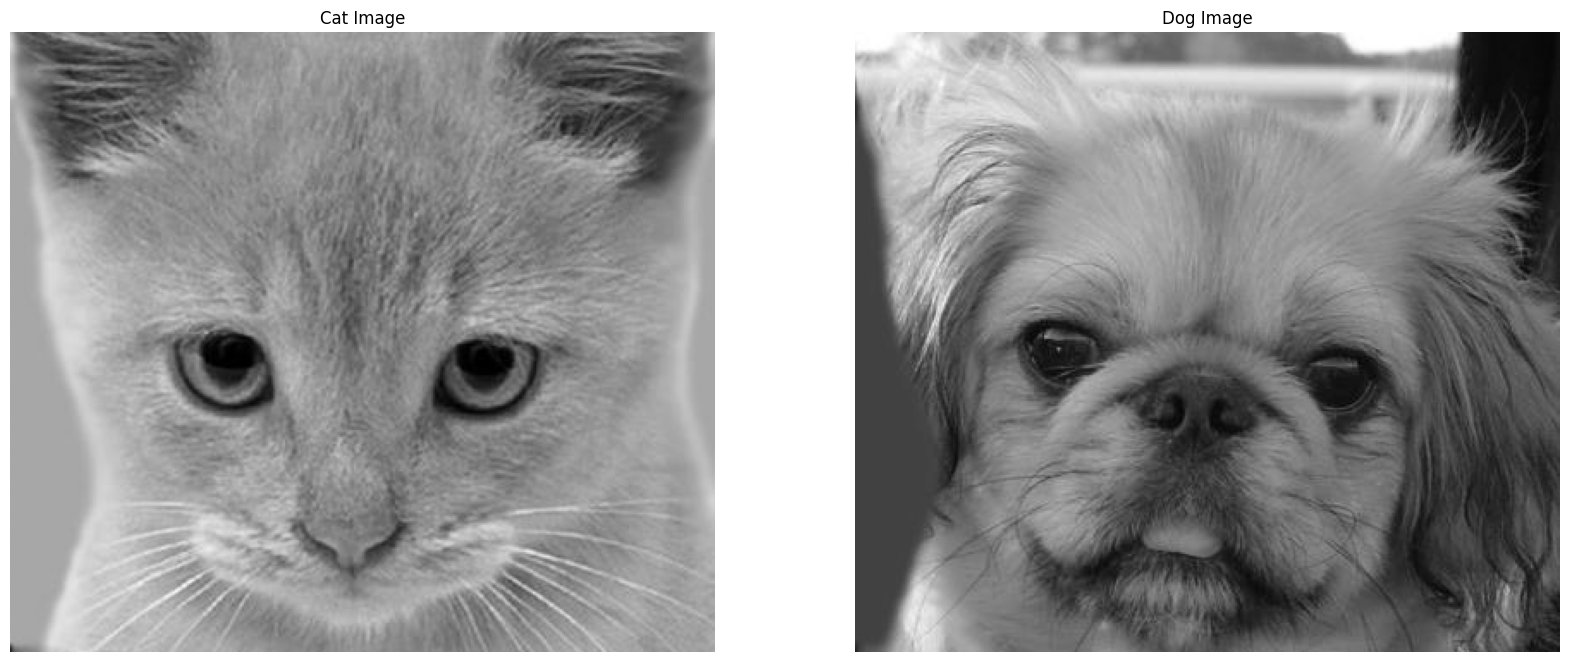

In [ ]:
# Step 1: Read and convert to grayscale
cat_img = cv2.imread(cat_path, cv2.IMREAD_GRAYSCALE)
dog_img = cv2.imread(dog_path, cv2.IMREAD_GRAYSCALE)

# Plot
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(cat_img, cmap='grey')
plt.title("Cat Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dog_img, cmap='grey')
plt.title("Dog Image")
plt.axis('off')

# saving the figure
plt.savefig("dog_cat_single_channel_grayscale.png")

plt.show()

## Computation of 2D Discreter Fourier Transform

In [ ]:
# compute 2D FFT of both the images
F1 = np.fft.fft2(cat_img)
F2 = np.fft.fft2(dog_img)

# compute 2D FFT of both the images
# with low frequencies at the centre
F1_shifted = np.fft.fftshift(F1)
F2_shifted = np.fft.fftshift(F2)

# since F1 and F2 may be complex values we
# need to take their magnitudes and plot them
F1_mag = np.abs(F1)
F2_mag = np.abs(F2)

F1_shifted_mag = np.abs(F1_shifted)
F2_shifted_mag = np.abs(F2_shifted)

F1_mag_db = 20 * np.log10(F1_mag + 1e-5)
F2_mag_db = 20 * np.log10(F2_mag + 1e-5)

F1_shifted_mag_db = 20 * np.log10(F1_shifted_mag + 1e-5)
F2_shifted_mag_db = 20 * np.log10(F2_shifted_mag + 1e-5)

# ====computation after rotation by 90deg in counterclockwise dir.=====

# rotate both images
cat_img_rot = np.rot90(cat_img)
dog_img_rot = np.rot90(dog_img)

# compute 2D FFT of both the images
F1_rot = np.fft.fft2(cat_img_rot)
F2_rot = np.fft.fft2(dog_img_rot)

# compute 2D FFT of both the images
# with low frequencies at the centre
F1_shifted_rot = np.fft.fftshift(F1_rot)
F2_shifted_rot = np.fft.fftshift(F2_rot)

# since F1 and F2 may be complex values we
# need to take their magnitudes and plot them
F1_mag_rot = np.abs(F1_rot)
F2_mag_rot = np.abs(F2_rot)

F1_shifted_mag_rot = np.abs(F1_shifted_rot)
F2_shifted_mag_rot = np.abs(F2_shifted_rot)

F1_mag_db_rot = 20 * np.log10(F1_mag_rot + 1e-5)
F2_mag_db_rot = 20 * np.log10(F2_mag_rot + 1e-5)

F1_shifted_mag_db_rot = 20 * np.log10(F1_shifted_mag_rot + 1e-5)
F2_shifted_mag_db_rot = 20 * np.log10(F2_shifted_mag_rot + 1e-5)

(np.float64(-0.5), np.float64(409.5), np.float64(360.5), np.float64(-0.5))

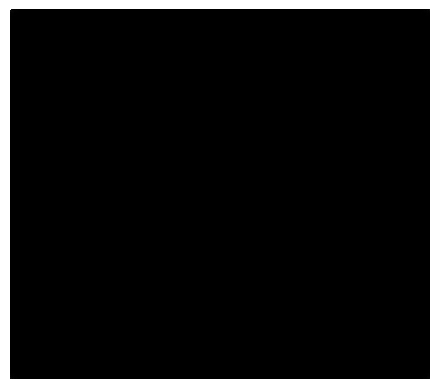

In [ ]:
# F1_mag_normalized = cv2.normalize(F1_mag, None, 0, 255, cv2.NORM_MINMAX)
F1_mag_normalized = (F1_mag / F1_mag.max() * 255).astype(np.uint8)
plt.imshow(F1_mag_normalized, cmap='grey')
plt.axis('off')

In [ ]:
np.unique(F1_mag_normalized, return_counts = True)
# we can see that the most of the pixels have value 0
# that's why we don't get anything actually out of this
# direct magnitude spectrum

(array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  12,  13,  14,
        255], dtype=uint8),
 array([147737,    164,     48,     24,     16,      2,      2,      6,
             2,      2,      2,      2,      2,      1]))

## Plot of Magnitude Spectrum of 2D DFT

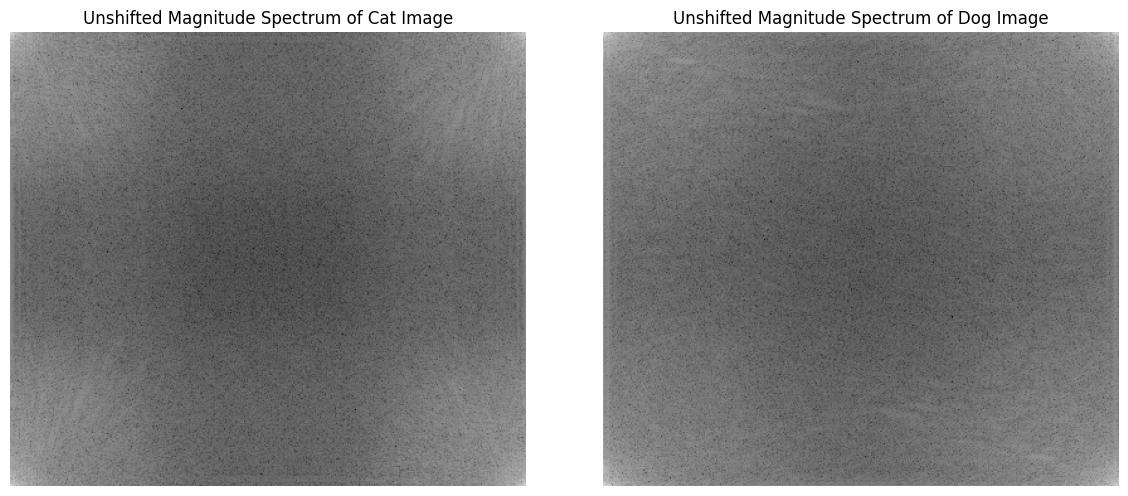

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(F1_mag_db, cmap='grey')
plt.axis('off')
plt.title('Unshifted Magnitude Spectrum of Cat Image')

plt.subplot(1, 2, 2)
plt.imshow(F2_mag_db, cmap='grey')
plt.axis('off')
plt.title('Unshifted Magnitude Spectrum of Dog Image')

# saving the figure
plt.savefig("dog_cat_unshifted_magnitude_spectrum.png")

plt.tight_layout()
plt.show()

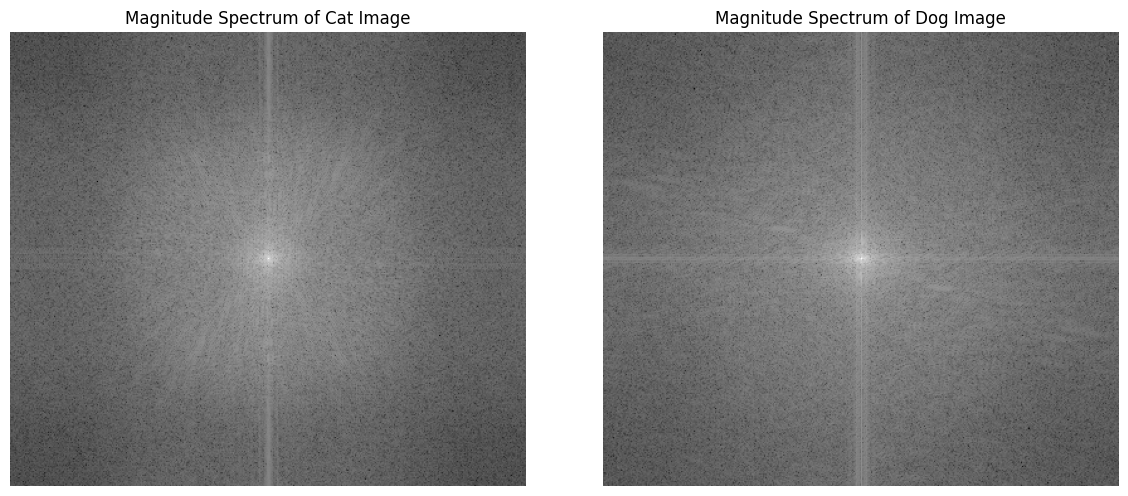

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(F1_shifted_mag_db, cmap='grey')
plt.axis('off')
plt.title('Magnitude Spectrum of Cat Image')

plt.subplot(1, 2, 2)
plt.imshow(F2_shifted_mag_db, cmap='grey')
plt.axis('off')
plt.title('Magnitude Spectrum of Dog Image')

# saving the figure
plt.savefig("dog_cat_magnitude_spectrum.png")

plt.tight_layout()
plt.show()

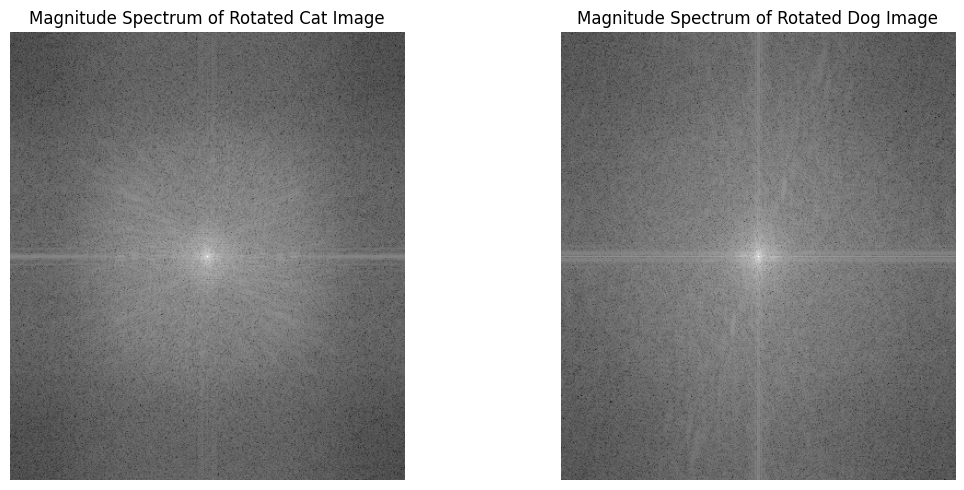

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(F1_shifted_mag_db_rot, cmap='grey')
plt.axis('off')
plt.title('Magnitude Spectrum of Rotated Cat Image')

plt.subplot(1, 2, 2)
plt.imshow(F2_shifted_mag_db_rot, cmap='grey')
plt.axis('off')
plt.title('Magnitude Spectrum of Rotated Dog Image')

# saving the figure
plt.savefig("dog_cat_rotated_mag_spec.png")

plt.tight_layout()
plt.show()

## Applying Gaussian Filter to 2D DFT of the images

In [ ]:
# let's create a Gaussian filter
def make_gaussian_filter(shape, cutoff, high_pass=False):
    """
    Generate a low-pass or high-pass Gaussian filter in frequency domain
    shape: (H, W)
    cutoff: standard deviation (controls how much frequency is passed)
    high_pass: if True, returns high-pass instead of low-pass
    """
    H, W = shape
    u = np.arange(H) - H // 2
    v = np.arange(W) - W // 2
    U, V = np.meshgrid(v, u)
    D2 = U**2 + V**2
    gaussian = np.exp(-D2 / (2 * (cutoff ** 2)))
    if high_pass:
        return 1 - gaussian
    return gaussian

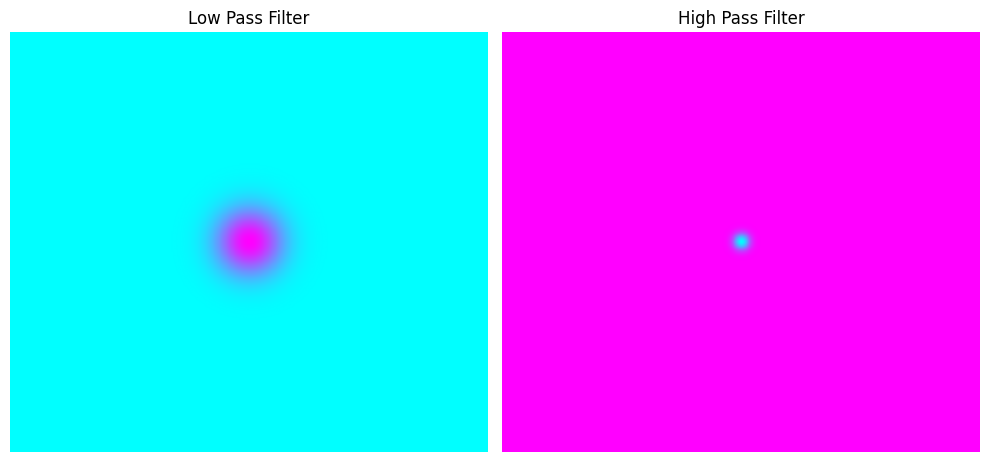

In [ ]:
low_pass = make_gaussian_filter(cat_img.shape, 20)
high_pass = make_gaussian_filter(cat_img.shape, 5, high_pass=True)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(low_pass, cmap='cool')
plt.title("Low Pass Filter")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_pass, cmap='cool')
plt.title("High Pass Filter")
plt.axis('off')

# saving the figure
plt.savefig("fft_filters.png")

plt.tight_layout()
plt.show()

In [ ]:
# fft_low_pass = np.fft.fft2(low_pass)
# fft_high_pass = np.fft.fft2(high_pass)

# fft_low_pass_shifted = np.fft.fftshift(fft_low_pass)
# fft_high_pass_shifted = np.fft.fftshift(fft_high_pass)

# fft_low_pass_mag = np.abs(fft_low_pass_shifted)
# fft_high_pass_mag = np.abs(fft_high_pass_shifted)

# fft_low_pass_mag = (fft_low_pass_mag / fft_low_pass_mag.max() * 255).astype(np.uint8)
# fft_high_pass_mag = (fft_high_pass_mag / fft_high_pass_mag.max() * 255).astype(np.uint8)

# plt.figure(figsize=(10,6))
# plt.subplot(1, 2, 1)
# plt.imshow(fft_low_pass_mag, cmap='grey')
# plt.title("DFT of Low Pass Filter")
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(fft_high_pass_mag, cmap='grey')
# plt.title("DFT of High Pass Filter")
# plt.axis('off')

# plt.tight_layout()
# plt.show()

# =============================================================

# Inverse Fourier Transform to spatial domain
def inverse_fft_centered(filter_freq):
    filter_shifted_back = np.fft.ifftshift(filter_freq)  # shift back before ifft
    kernel_complex = np.fft.ifft2(filter_shifted_back)
    kernel = np.real(kernel_complex)
    # return np.abs(kernel_complex)
    return kernel

low_pass_spatial = inverse_fft_centered(low_pass)
high_pass_spatial = inverse_fft_centered(high_pass)

# =============================================================

# # Normalize for visualization
# def normalize(img):
#     # img = img - img.min()
#     # return img / img.max()
#     return (img / img.max() * 255).astype(np.uint8)

# # Plot
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(normalize(low_pass_spatial), cmap='grey')
# plt.title("Inverse FFT of Low-Pass Gaussian")
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(normalize(high_pass_spatial), cmap='grey')
# plt.title("Inverse FFT of High-Pass Gaussian")
# plt.axis('off')

# plt.tight_layout()
# plt.show()

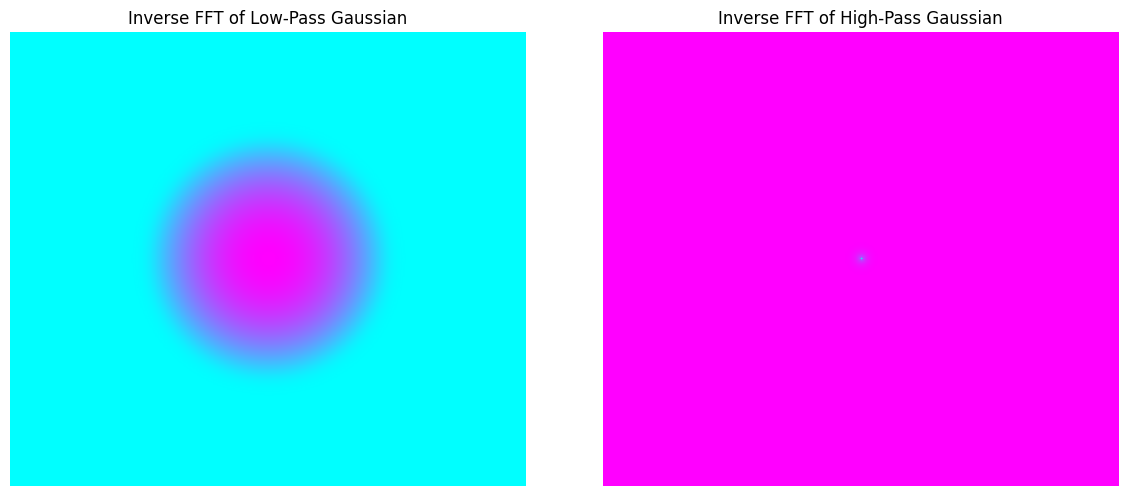

In [ ]:
high_pass_inverse = 20 * np.log10(np.abs(np.fft.fftshift(np.fft.fft2(high_pass_spatial))) + 1e-5)
low_pass_inverse = 20 * np.log10(np.abs(np.fft.fftshift(np.fft.fft2(low_pass_spatial))) + 1e-5)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(low_pass_inverse, cmap='cool')
plt.title("Inverse FFT of Low-Pass Gaussian")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_pass_inverse, cmap='cool')
plt.title("Inverse FFT of High-Pass Gaussian")
plt.axis('off')

# saving the figure
plt.savefig("fft_inverse_filters.png")

plt.tight_layout()
plt.show()

In [ ]:
first = F2_shifted * low_pass
second = F1_shifted * high_pass

# first = F2_shifted * fft_low_pass_shifted
# second = F1_shifted * fft_high_pass_shifted

# Inverse FFT
first = np.fft.ifftshift(first)
first = np.fft.ifft2(first)

second = np.fft.ifftshift(second)
second = np.fft.ifft2(second)

# # Get real part and normalize
first = np.abs(first)
first = (first / first.max() * 255).astype(np.uint8)

second = np.abs(second)
second= (second / second.max() * 255).astype(np.uint8)

## Final filtered images

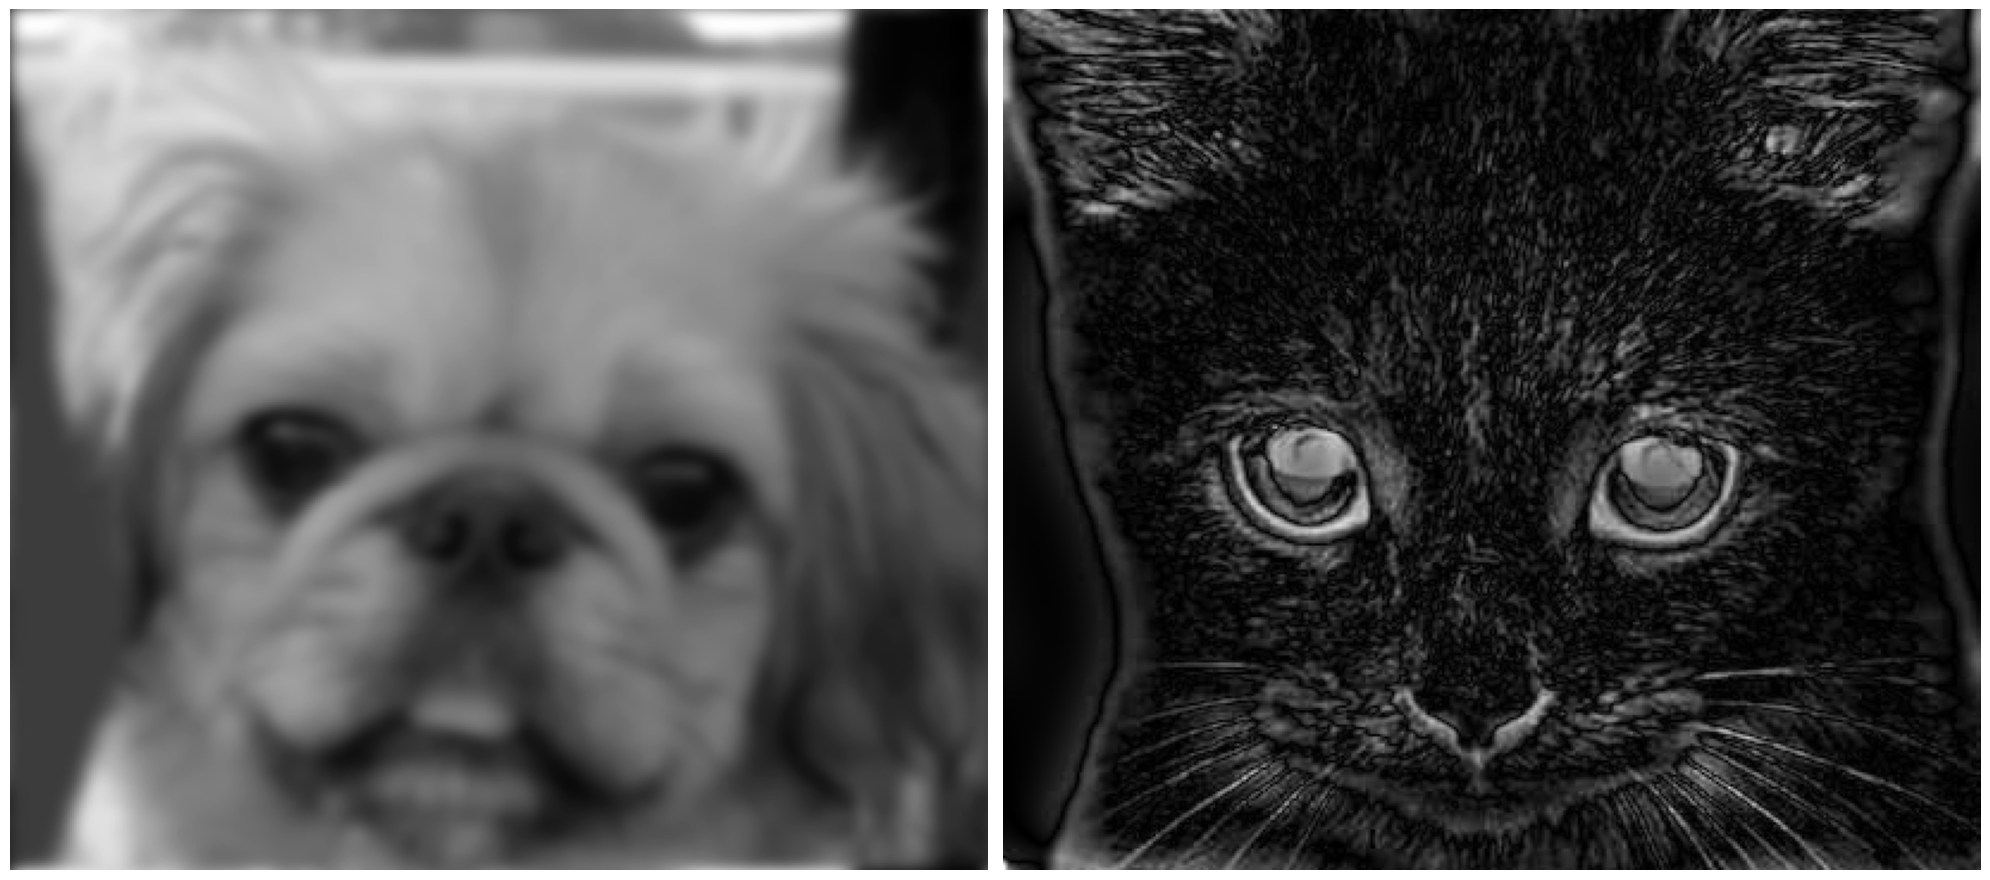

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(first, cmap='grey')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(second, cmap='grey')
plt.axis('off')

# saving the figure
plt.savefig("fft_filtered_images.png")

plt.tight_layout()
plt.show()

## Final fused "Hybrid Image"

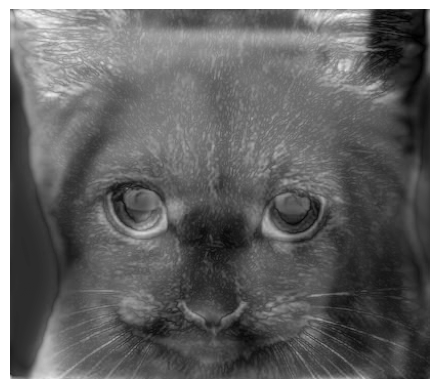

In [ ]:
height, width = first.shape

# tx = shift in x direction
# ty = shift in y direction
tx = 0
ty = 0

# Translate the dog image slightly to align face (example: shift right by 10px)
M = np.float32([[1, 0, tx],  # tx = shift in x (left/right)
                [0, 1, ty]]) # ty = shift in y (up/down)
first_aligned = cv2.warpAffine(first, M, (width, height))

# fuse both the above images
fused = cv2.addWeighted(first_aligned, 0.6, second, 0.4, 0)

# reduces size by half using Gaussian smoothing
# fused = cv2.pyrDown(fused)

plt.imshow(fused, cmap='grey')
plt.axis('off')

# saving the final hybrid image
plt.savefig("hybrid_image.png")

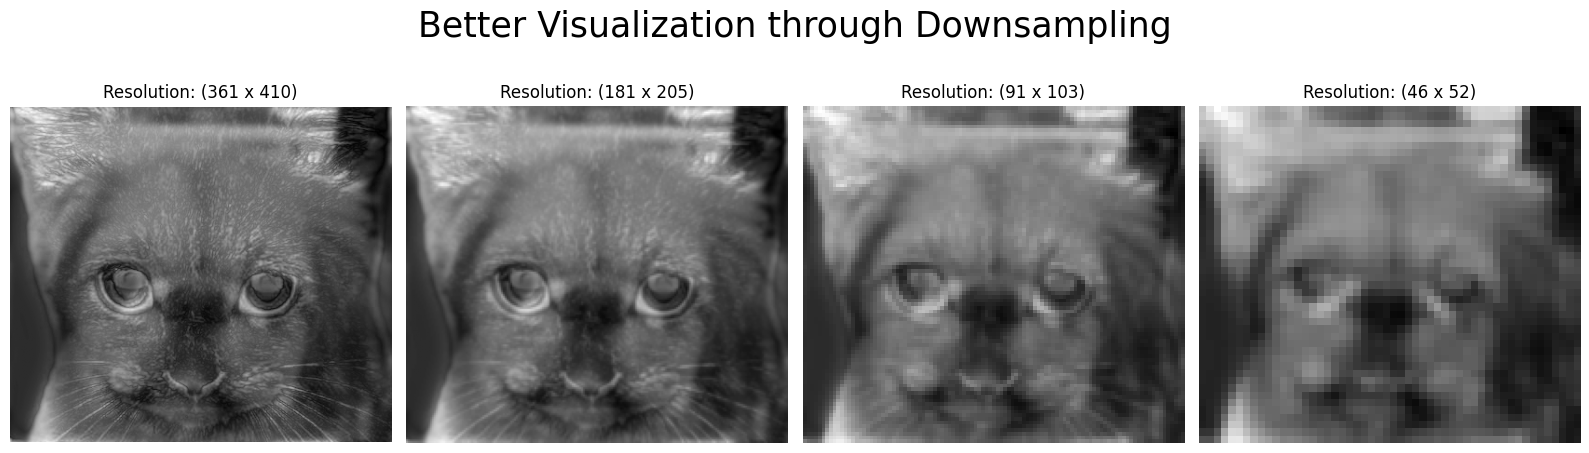

In [ ]:
# Number of levels (iterations)
levels = 4
current = fused.copy()

# Prepare subplots
fig, axes = plt.subplots(1, levels, figsize=(16, 5))

for i in range(levels):
    height, width = current.shape
    axes[i].imshow(current, cmap='grey')
    axes[i].set_title(f"Resolution: ({height} x {width})")
    axes[i].axis('off')

    # Apply downsampling for next level
    if current.shape[0] > 1 and current.shape[1] > 1:
        current = cv2.pyrDown(current)
    else:
        print(f"Too small to downsample further at level {i}")
        break
plt.suptitle("Better Visualization through Downsampling", fontsize=25)

# saving the downsampled images
plt.savefig("donwsampled_hybrid.png")

plt.tight_layout()
plt.show()

# Ques 2

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [2]:
# loading the audio file
audio_path = '/content/song_with_2piccolo.wav'
y, sr = librosa.load(audio_path, sr=None) # sr stands for sampling rate

In [3]:
# if we print the "length of y" we'll get len(y) = 720001
# it means there are 720001 samples there and then we also
# have the sampling rate that is sr = 48kHz
# so we can easily found out the duration of the track by
# dividing the "no. of samples" by the "sampling rate"

# basically we can understand it as that the "sampling rate"
# means the no. of samples taken per second thus sr = 48kHZ
# means 48000 samples are taken per second for total 15 secs

print(f"Sample Rate: {sr} Hz")
print(f"Duration: {len(y) / sr:.2f} seconds")

Sample Rate: 48000 Hz
Duration: 15.00 seconds


In [4]:
y_normalized = y / np.max(np.abs(y))

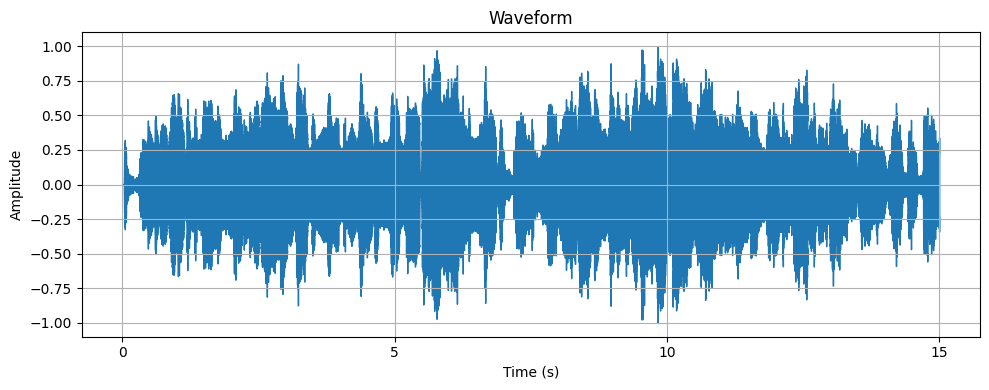

In [5]:
# plotting the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_normalized, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# saving the plot
plt.savefig("waveform.png")

plt.tight_layout()
plt.show()

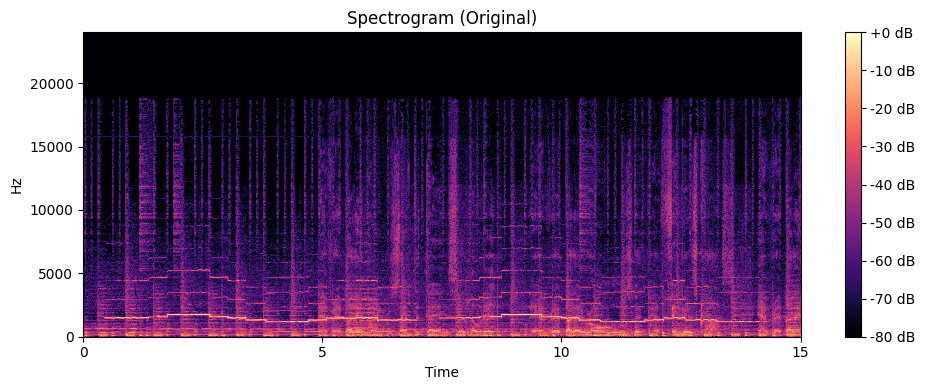

In [6]:
# plotting the spectogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (Original)")

# saving the spectogram plot
plt.savefig("spectogram_orig.png")

plt.tight_layout()
plt.show()

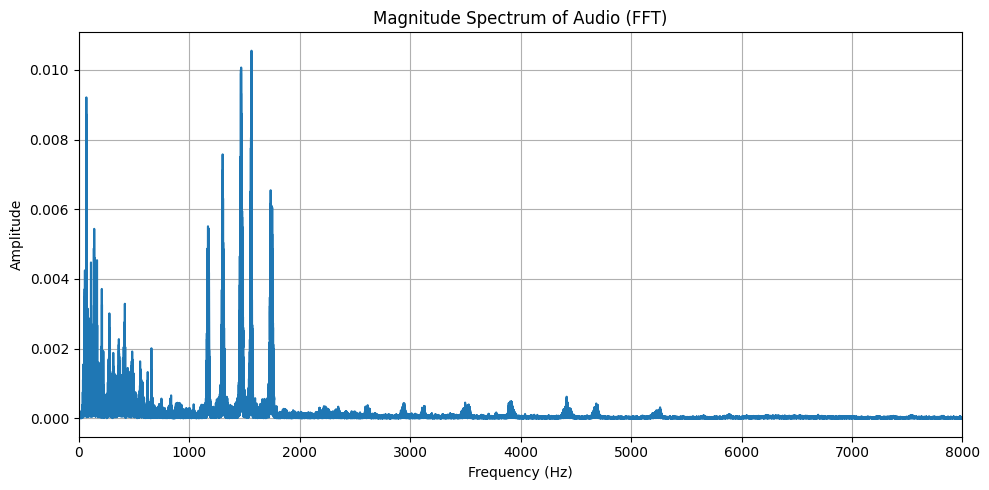

In [7]:
# Compute FFT
n = len(y)
Y = np.fft.fft(y)
frequencies = np.fft.fftfreq(n, 1/sr)
magnitude = np.abs(Y) / n

# # Assuming frequencies is a NumPy array
x_freq = np.linspace(0, len(frequencies)-1, num=1000, dtype=int)
y_freq = frequencies[x_freq]

plt.figure(figsize=(10, 5))

# Plot only the positive frequencies
plt.plot(frequencies[:n//2], magnitude[:n//2])
plt.title("Magnitude Spectrum of Audio (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 8000)

# saving the plot
plt.savefig("audio_fft_mag_spec.png")

plt.tight_layout()
plt.show()

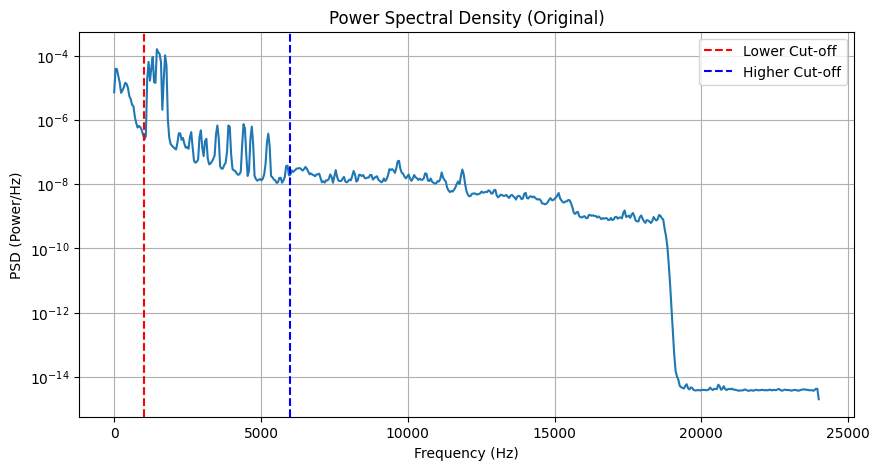

In [8]:
from scipy.signal import welch
import matplotlib.pyplot as plt

f, Pxx = welch(y, sr, nperseg=1024)
plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (Power/Hz)")
plt.axvline(x=1000, color='r', linestyle='--', label='Lower Cut-off')
plt.axvline(x=6000, color='b', linestyle='--', label='Higher Cut-off')
plt.title("Power Spectral Density (Original)")
plt.legend()
plt.grid(True)
plt.savefig('psd_orig.png')
plt.show()

In [9]:
# from the above plots, we can say that the maximum noise
# content lies in the frequency range between 1kHz to 6kHz

# we'll use built in functions of Scipy library to directly
# apply the "Butterworth Filter" in the time-domain of the
# signal instead of masking the frequency range in frequency
# domain

# doing so is preferable since directly applying filters in
# frequency domain may modify the phase of the signal and
# may not lead to a smoother output

In [10]:
# Plot and save results
def plot_denoising_results(original, filtered, sr, label, filename):
    n = len(filtered)
    Y_orig = np.fft.fft(original[:n])
    Y_filt = np.fft.fft(filtered)
    freqs = np.fft.fftfreq(n, d=1/sr)
    t = np.linspace(0, n / sr, n)
    diff = np.abs(original[:n]) - np.abs(filtered)

    plt.figure(figsize=(14, 8))

    # FFT Spectrum
    plt.subplot(3, 1, 1)
    plt.plot(freqs[:n//2], np.abs(Y_orig[:n//2]), label="Original FFT", alpha=0.4)
    plt.plot(freqs[:n//2], np.abs(Y_filt[:n//2]), label="Filtered FFT", color='green')
    plt.title(f"{label} - FFT Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.xlim(0, 2500)
    plt.grid(True)

    # Time-domain signal
    plt.subplot(3, 1, 2)
    plt.plot(t, filtered, color='blue')
    plt.title(f"{label} - Filtered Signal (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Magnitude difference
    plt.subplot(3, 1, 3)
    plt.plot(t, diff, color='red')
    plt.title(f"{label} - Difference |Original| - |Filtered|")
    plt.xlabel("Time (s)")
    plt.ylabel("Difference")
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

### Butterworth Filter

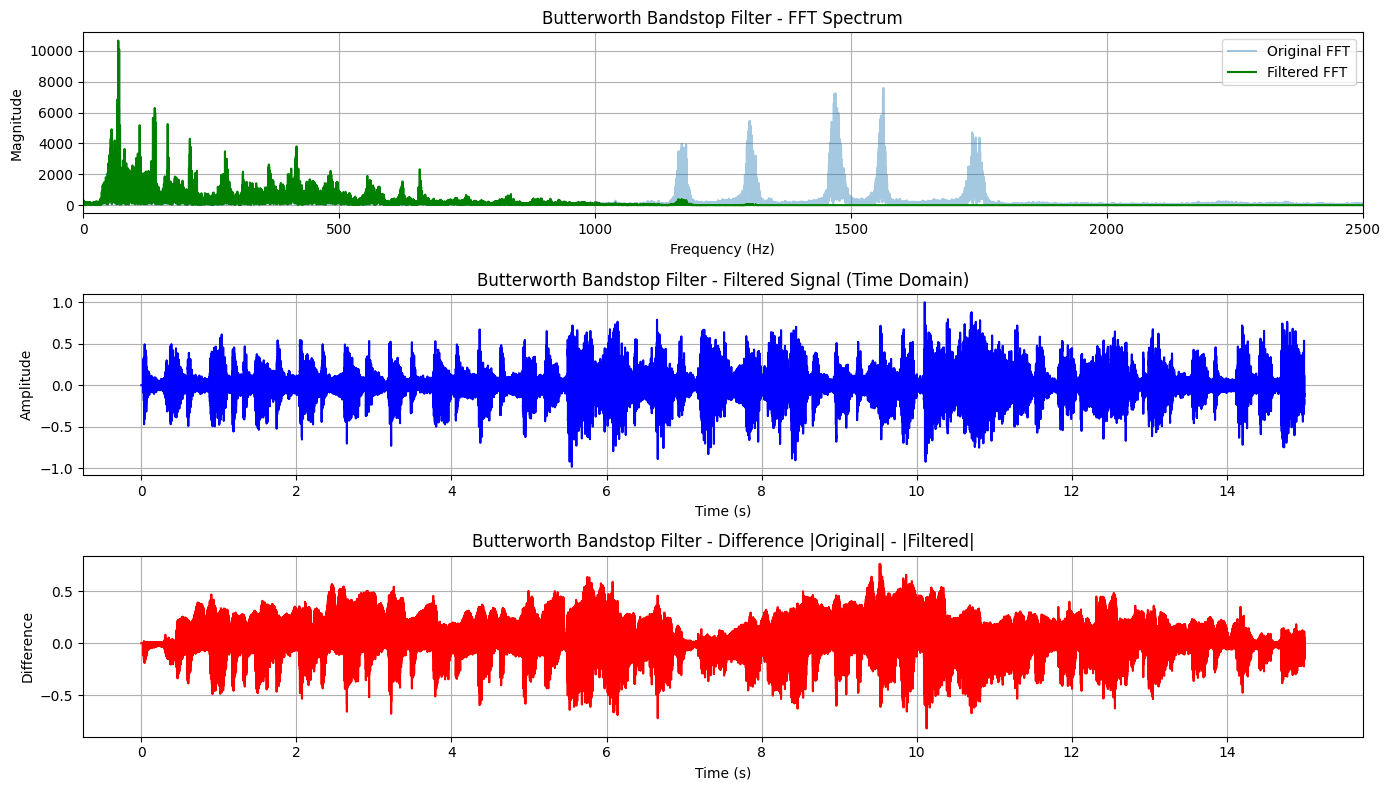

In [11]:
from scipy.signal import butter, filtfilt
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

# === Design Butterworth Bandpass Filter ===
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a

# === Apply Bandpass Filter ===
def apply_butter_bandpass(y, sr, lowcut, highcut, order=4):
    b, a = butter_bandpass(lowcut, highcut, sr, order)
    # filtfilt for zero-phase filtering (better for audio)
    y_filtered = filtfilt(b, a, y)
    # Normalize to prevent clipping
    y_filtered /= np.max(np.abs(y_filtered)) + 1e-10
    return y_filtered

# === Filter the Signal ===
# order decides how ideal the filter will be
y_out = apply_butter_bandpass(y, sr, lowcut=1000, highcut=6000, order=6)

# === Save the Output ===
sf.write("output.wav", y_out, sr)

# === Plotting Function (Assuming Defined Elsewhere) ===
plot_denoising_results(y, y_out, sr, "Butterworth Bandstop Filter", "out_diff.png")

### Comparison between Original and Filtered Audio

In [12]:
# filtered audio
from IPython.display import Audio
Audio(y_out, rate=sr)

In [13]:
# original audio
from IPython.display import Audio
Audio(y, rate=sr)

In [14]:
# we can clearly find a lot of improvement in terms
# of clear vocal sounds and suppressed instrumental
# music in the filtered audio in comparison to the
# originally given audio signal

### Visualization of Filtering Effects

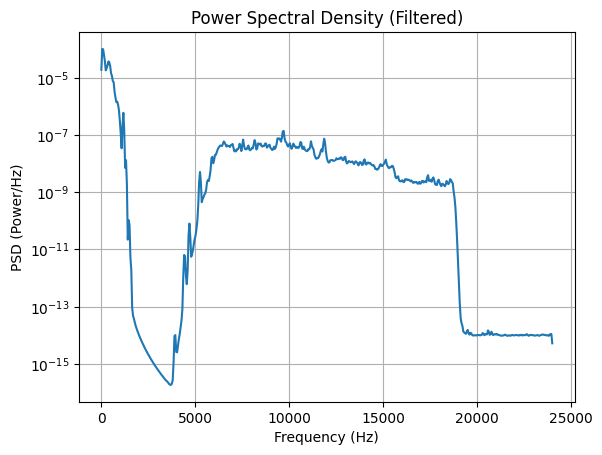

In [16]:
from scipy.signal import welch
import matplotlib.pyplot as plt

f, Pxx = welch(y_out, sr, nperseg=1024)
plt.semilogy(f, Pxx)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (Power/Hz)")
plt.title("Power Spectral Density (Filtered)")
plt.grid(True)
plt.savefig('psd_filt.png')
plt.show()

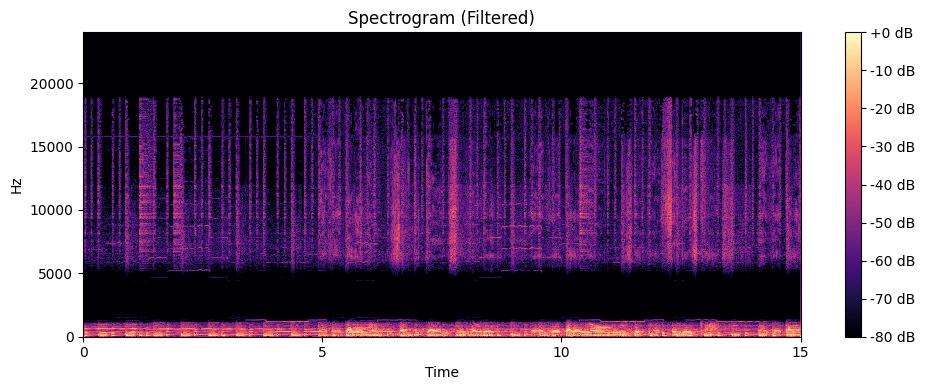

In [17]:
import librosa.display

S = librosa.stft(y_out)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (Filtered)")
plt.tight_layout()
plt.savefig('spectogram_filt.png')
plt.show()